In [ ]:
 When answering the below questions, you would require to reshape 
the data i.e., convert from wide to long and long to wide (with stack(), unstack() and pivot()) 
after aggregating it by using groupby(). Please refer to the material at Pandas – Data 
Understanding.ipynb for details.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_sales = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 4 - Python Visualizations Case Study//"
file_name_sales = "SalesData.csv"

file_path_sales + file_name_sales

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 4 - Python Visualizations Case Study//SalesData.csv'

In [3]:
salesdata = pd.read_csv(file_path_sales + file_name_sales)

In [4]:
salesdata

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [ ]:
1. Compare Sales by region for 2016 with 2015 using bar chart

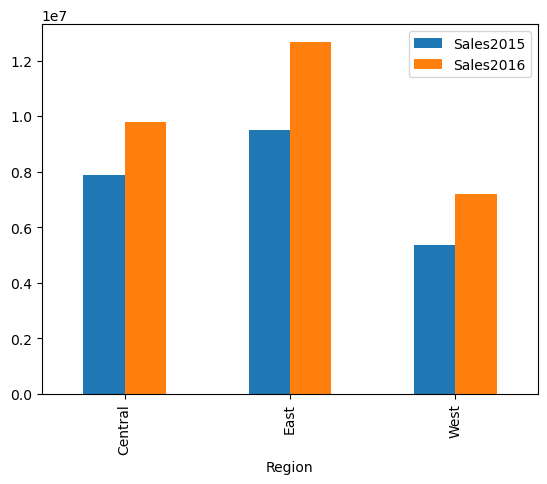

In [15]:
salesdata.groupby('Region')[['Sales2015','Sales2016']].agg(
    {'Sales2015':np.sum,'Sales2016':np.sum}).plot(kind='bar')
plt.show()

In [ ]:
2. What are the contributing factors to the sales for each region in 2016. Visualize it using a 
Pie Chart.

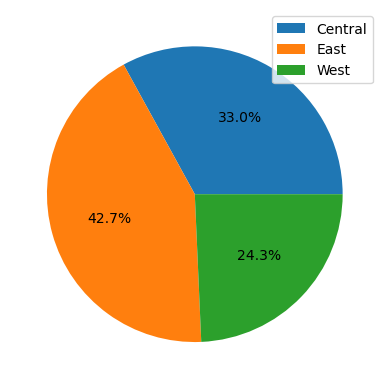

In [29]:
piedata = salesdata.groupby('Region')['Sales2016'].sum()
plt.pie(piedata, autopct='%1.1f%%')
plt.legend(list(piedata.index))
plt.show()

In [ ]:
3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [96]:
table3 = salesdata.pivot_table(index='Tier',values=['Sales2015','Sales2016'], columns='Region', aggfunc='sum')
table3

Sales2015                             Sales2016              \
Region       Central        East        West       Central        East   
Tier                                                                     
High    4.798698e+06  6102946.12  2944789.26  6.026043e+06  7817151.10   
Low     9.434397e+05   901665.80   671064.38  1.132833e+06  1144929.59   
Med     2.068226e+06  2470998.02  1718475.92  2.632181e+06  3705149.76   
Out     8.136489e+04    37306.55    15415.08 -3.248530e+03        0.00   

                      
Region          West  
Tier                  
High    3.768038e+06  
Low     1.099502e+06  
Med     2.342149e+06  
Out     0.000000e+00

In [ ]:
4. In East region, which state registered a decline in 2016 as compared to 2015?

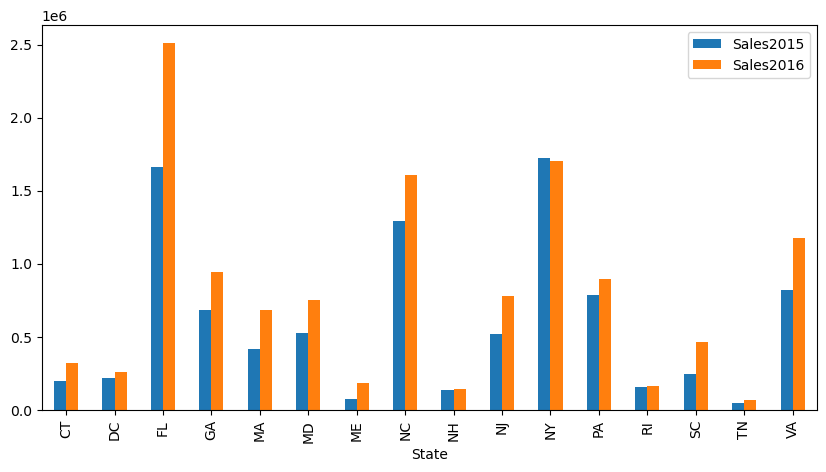

In [33]:
table1 = salesdata.loc[salesdata['Region']=='East']
table1.pivot_table(index=['State'],values=['Sales2015','Sales2016'], aggfunc='sum').plot(kind='bar',figsize=(10,5))
plt.show()

In [ ]:
5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared 
to 2015?

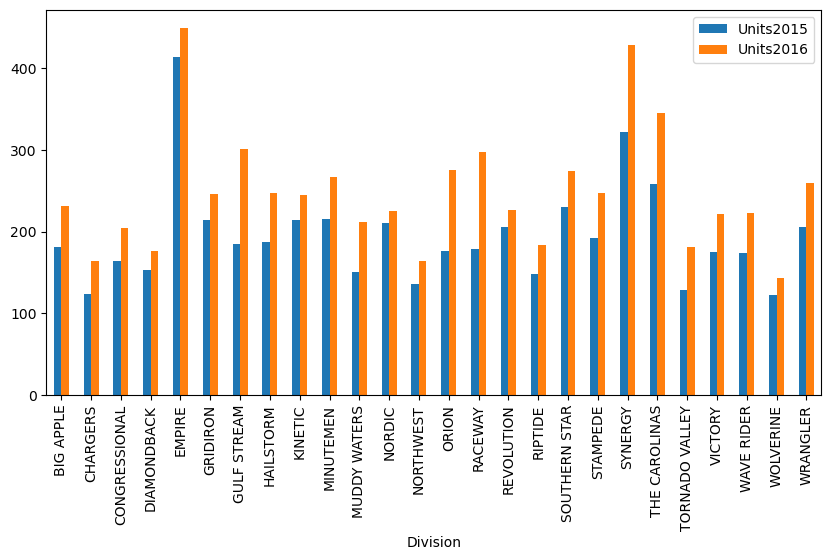

In [38]:
table1 = salesdata.loc[salesdata['Tier']=='High']
table1.pivot_table(index=['Division'],values=['Units2015','Units2016'], aggfunc='sum').plot(kind='bar',figsize=(10,5))
plt.show()

In [ ]:
6. Create a new column Qtr using numpy.where() or any suitable utility in the imported 
dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4 

In [50]:
salesdata['Qtr'] = pd.to_datetime(salesdata['Month'], format = '%b')
salesdata['Qtr'] = salesdata['Qtr'].dt.to_period('Q').dt.strftime('Q%q')

In [ ]:
7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

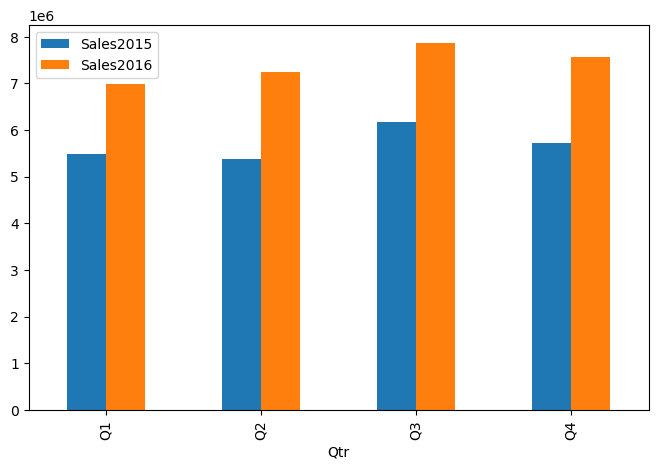

In [53]:
salesdata.pivot_table(index=['Qtr'],values=['Sales2015','Sales2016'], aggfunc='sum').plot(kind='bar',figsize=(8,5))
plt.show()

In [ ]:
8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a 
pie chart.
(Draw 4 pie charts representing a Quarter for each Tier

In [89]:
salesdata.pivot_table(index=['Qtr','Tier'],values='Sales2016', aggfunc='sum')

Sales2016
Qtr Tier              
Q1  High  3.867719e+06
    Low   9.488328e+05
    Med   2.181402e+06
    Out   0.000000e+00
Q2  High  4.130953e+06
    Low   8.905948e+05
    Med   2.215814e+06
    Out   0.000000e+00
Q3  High  4.872559e+06
    Low   7.951777e+05
    Med   2.197058e+06
    Out  -3.248530e+03
Q4  High  4.740002e+06
    Low   7.426594e+05
    Med   2.085207e+06
    Out   0.000000e+00